<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout

In [30]:
#Load MNIST data from tf datasets
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


In [31]:
N, D1, D2 = X_train.shape
K = 10

i = Input(shape = (D1,D2))
x = Flatten()(i)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(inputs = i, outputs = x)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2965 - accuracy: 0.9131 - val_loss: 0.1488 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.1047 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9673 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9730 - val_loss: 0.0747 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9797 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0725 - val_accuracy:

In [32]:
print("train score:", model.evaluate(X_train, y_train))
print("test score:",model.evaluate(X_test, y_test))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9948
train score: [0.018401525914669037, 0.9947999715805054]
313/313 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9788
test score: [0.07313849776983261, 0.9787999987602234]


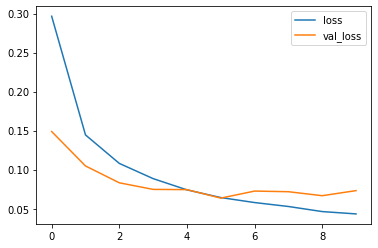

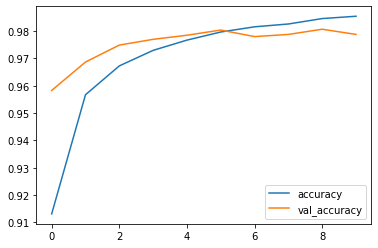

In [33]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [42]:
p_test = model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[ 972,    0,    2,    1,    0,    1,    1,    1,    1,    1],
       [   0, 1125,    3,    1,    0,    1,    2,    1,    2,    0],
       [   1,    0, 1020,    1,    1,    0,    2,    4,    3,    0],
       [   0,    0,    9,  990,    0,    2,    0,    4,    3,    2],
       [   1,    0,    6,    0,  958,    0,    2,    5,    0,   10],
       [   2,    0,    0,   16,    1,  861,    2,    1,    7,    2],
       [   6,    3,    3,    1,    2,    5,  934,    1,    3,    0],
       [   0,    2,   15,    2,    0,    0,    0, 1004,    1,    4],
       [   4,    0,    6,    7,    3,    2,    1,    3,  945,    3],
       [   1,    2,    0,   11,    4,    2,    1,    7,    2,  979]])

Text(0.5, 1.0, 'True Label: 9 Predicted Label: 4')

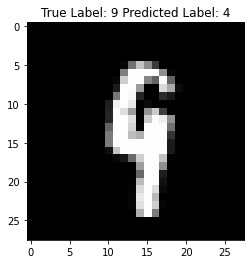

In [52]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s Predicted Label: %s" %(y_test[i], p_test[i]))